In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv('gas_final.csv')

In [ ]:
df.head()

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,rate,setpoint,control_mode,control_scheme,pump,solenoid,crc_rate,measurement,time,result
0,4,4,183,233,9,18,3,10,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.517241,1.029393,0.0
1,2,4,183,233,9,18,3,10,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.069859,6.0
2,4,4,183,233,9,18,3,10,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.528736,1.244466,0.0
3,4,4,183,233,9,18,3,10,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.251695,0.0
4,5,4,183,233,9,18,3,10,3.0,10.0,...,0.0,20.0,2.0,1.0,0.0,0.0,0.0,0.540230,1.123325,6.0


In [ ]:
df.isnull().sum()

command_address          0
response_address         0
command_memory           0
response_memory          0
command_memory_count     0
response_memory_count    0
comm_read_function       0
comm_write_fun           0
resp_read_fun            1
resp_write_fun           1
sub_function             1
command_length           1
resp_length              1
gain                     1
reset                    1
deadband                 1
cycletime                1
rate                     1
setpoint                 1
control_mode             1
control_scheme           1
pump                     1
solenoid                 1
crc_rate                 1
measurement              1
time                     1
result                   1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(['result'],axis=1)
y = df['result']

In [ ]:
import imblearn
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=60, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

In [ ]:

X_rus.head()

,command_address,response_address,command_memory,response_memory,command_memory_count,response_memory_count,comm_read_function,comm_write_fun,resp_read_fun,resp_write_fun,...,cycletime,rate,setpoint,control_mode,control_scheme,pump,solenoid,crc_rate,measurement,time
0,4,4,183,233,9,18,3,10,3,10,...,1,0,20,2,1,0,0,0,0.609195,1.153153
1,4,4,183,233,9,18,3,10,1,10,...,1,0,20,0,1,0,0,0,0.229885,1.297467
2,4,4,183,233,9,18,3,10,3,10,...,1,0,20,0,1,0,0,0,0.459770,1.189089
3,4,4,183,233,9,18,3,10,3,10,...,1,0,20,0,1,0,0,0,0.482759,1.097396
4,4,4,183,233,9,18,3,10,3,10,...,1,0,20,0,1,0,0,0,0.229885,1.011971


In [ ]:
y_rus.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [ ]:
X_rus.shape

(4584, 26)

In [ ]:
y_rus.shape

(4584,)

In [ ]:
df.shape

(97012, 27)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_rus,y_rus,test_size=0.3,random_state=1)


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(random_state=0)

In [ ]:
model.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
               n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

monotone_constraints='()'
model = XGBClassifier(use_label_enocer=False, eval_metrics='mlogloss',random_state=0)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([6, 2, 5, ..., 0, 2, 0])

In [ ]:


y_score = model.predict_proba(X_test)

Accuracy:  0.9789244186046512
Precision: 0.9796
Recall: 0.9796
F1 Score: 0.9794


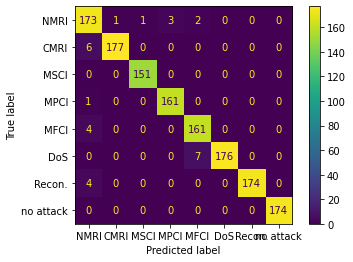

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.920     0.961     0.940       180
           1      0.994     0.967     0.981       183
           2      0.993     1.000     0.997       151
           3      0.982     0.994     0.988       162
           4      0.947     0.976     0.961       165
           5      1.000     0.962     0.981       183
           6      1.000     0.978     0.989       178
           7      1.000     1.000     1.000       174

    accuracy                          0.979      1376
   macro avg      0.980     0.980     0.979      1376
weighted avg      0.980     0.979     0.979      1376



In [ ]:
from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
from statistics import mean
print(mean(TPR))
print(mean(TNR))

0.9796482107355042
0.9969875750388911


In [ ]:
from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9982911606027903


**RANDOM FOREST**


In [ ]:
#import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

Accuracy:  0.9723837209302325
Precision: 0.9734
Recall: 0.9733
F1 Score: 0.9732


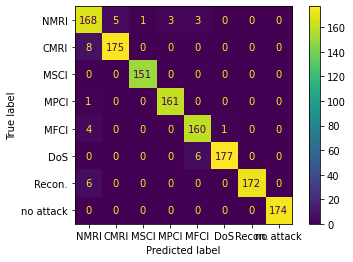

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.898     0.933     0.916       180
           1      0.972     0.956     0.964       183
           2      0.993     1.000     0.997       151
           3      0.982     0.994     0.988       162
           4      0.947     0.970     0.958       165
           5      0.994     0.967     0.981       183
           6      1.000     0.966     0.983       178
           7      1.000     1.000     1.000       174

    accuracy                          0.972      1376
   macro avg      0.973     0.973     0.973      1376
weighted avg      0.973     0.972     0.973      1376



In [ ]:
from sklearn.metrics import roc_auc_score
y_score = clf.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9954095665479218

In [ ]:
from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
from statistics import mean
print(mean(TPR))
print(mean(TNR))

0.9733308582643942
0.9960456254836538


In [ ]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**BAGGING**

In [ ]:
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score

In [ ]:
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(),
n_estimators=100,
max_samples=0.8,
bootstrap=True,
oob_score=True,
random_state=0
)

In [ ]:
scores = cross_val_score(bag_model, X_rus, y_rus, cv=5)
scores.mean()

0.9725095598424709

In [ ]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [ ]:
bag_model.oob_score_

0.9756857855361596

In [ ]:
bag_model.score(X_test, y_test)

0.9752906976744186

In [ ]:

y_pred = bag_model.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))

Accuracy:  0.9752906976744186
Precision: 0.9762
Recall: 0.9762
F1 Score: 0.9760


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.909     0.944     0.926       180
           1      0.983     0.956     0.970       183
           2      0.993     1.000     0.997       151
           3      0.988     0.994     0.991       162
           4      0.936     0.976     0.955       165
           5      1.000     0.962     0.981       183
           6      1.000     0.978     0.989       178
           7      1.000     1.000     1.000       174

    accuracy                          0.975      1376
   macro avg      0.976     0.976     0.976      1376
weighted avg      0.976     0.975     0.975      1376



Accuracy:  0.9752906976744186
Precision: 0.9762
Recall: 0.9762
F1 Score: 0.9760


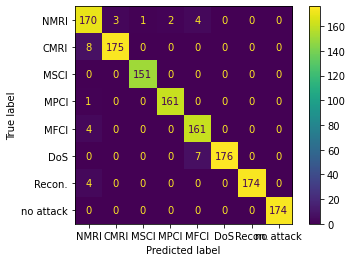

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score
y_score = bag_model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9948311420084114

In [ ]:
from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
from statistics import mean
print(mean(TPR))
print(mean(TNR))

0.9761987571835917
0.9964655136424676


**DECISION TREE**

In [ ]:
model_1 = tree.DecisionTreeClassifier()

In [ ]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))

Accuracy:  0.9680232558139535
Precision: 0.9683
Recall: 0.9691
F1 Score: 0.9686


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.905     0.900     0.903       180
           1      0.978     0.956     0.967       183
           2      0.981     1.000     0.990       151
           3      0.982     0.994     0.988       162
           4      0.929     0.958     0.943       165
           5      0.989     0.962     0.975       183
           6      0.983     0.983     0.983       178
           7      1.000     1.000     1.000       174

    accuracy                          0.968      1376
   macro avg      0.968     0.969     0.969      1376
weighted avg      0.968     0.968     0.968      1376



In [ ]:
from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9982911606027903



 **C5.0 TREE**

---



In [ ]:
#Importing packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=8, max_features='auto',
                       random_state=1024)

In [ ]:

tree_clas = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=7)

In [ ]:
y_pred = grid_search.predict(X_test)

Accuracy:  0.9280523255813954
Precision: 0.9483
Recall: 0.9297
F1 Score: 0.9327


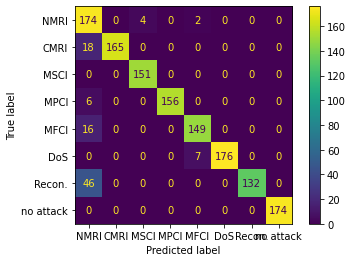

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.669     0.967     0.791       180
           1      1.000     0.902     0.948       183
           2      0.974     1.000     0.987       151
           3      1.000     0.963     0.981       162
           4      0.943     0.903     0.923       165
           5      1.000     0.962     0.981       183
           6      1.000     0.742     0.852       178
           7      1.000     1.000     1.000       174

    accuracy                          0.928      1376
   macro avg      0.948     0.930     0.933      1376
weighted avg      0.947     0.928     0.931      1376



In [ ]:
from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
from statistics import mean
print(mean(TPR))
print(mean(TNR))

0.9297026180637343
0.9896745581098254


In [ ]:
from sklearn.metrics import roc_auc_score
y_score = model.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.8971517669392274

**LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_LDA = LinearDiscriminantAnalysis()
model_LDA.fit(X_train, y_train)



LinearDiscriminantAnalysis()

In [ ]:
y_pred = model_LDA.predict(X_test)

Accuracy:  0.7754360465116279
Precision: 0.8097
Recall: 0.7856
F1 Score: 0.7810


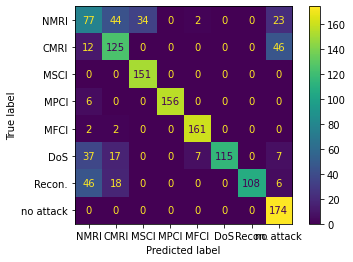

In [ ]:
#import scikit-learn metric module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred,average = 'macro'))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average ='macro'))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['NMRI','CMRI','MSCI','MPCI','MFCI','DoS','Recon.','no attack'])
cm_display.plot()
plt.show()


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.428     0.428     0.428       180
           1      0.607     0.683     0.643       183
           2      0.816     1.000     0.899       151
           3      1.000     0.963     0.981       162
           4      0.947     0.976     0.961       165
           5      1.000     0.628     0.772       183
           6      1.000     0.607     0.755       178
           7      0.680     1.000     0.809       174

    accuracy                          0.775      1376
   macro avg      0.810     0.786     0.781      1376
weighted avg      0.806     0.775     0.774      1376



In [ ]:
from importlib import import_module
import numpy as np
FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix)
TN = confusion_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
from statistics import mean
print(mean(TPR))
print(mean(TNR))

0.7855894124210112
0.9678221159802515


In [ ]:
from sklearn.metrics import roc_auc_score
y_score = model_LDA.predict_proba(X_test)
roc_auc_score(y_test,y_score, multi_class='ovo')

0.9575487596495934